In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# impoer matplotlib as 

In [66]:
# obesity = pd.read_csv('Obesity_Classification.csv')
obesity = pd.read_csv('Obesity_Classification.csv', sep = ',')

In [22]:
obesity

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [4]:
obesity.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [5]:
obesity.tail()

,ID,Age,Gender,Height,Weight,BMI,Label
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight
107,110,31,Male,190,20,8.3,Underweight


In [6]:
obesity.sample()

,ID,Age,Gender,Height,Weight,BMI,Label
62,65,36,Male,190,75,24.2,Normal Weight


In [7]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [8]:
obesity.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [9]:
obesity.shape

(108, 7)

In [51]:
obesity = obesity.describe(include ='all')
obesity.rename(index = {'count' : 'observations'}, inplace = True)

obesity.loc['null_observations'] = obesity.isnull().sum()
obesity.loc[['observations', 'null_observations']]

,ID,Age,Gender,Height,Weight,BMI,Label
observations,9.0,9.0,9.0,9.0,9.0,9.0,9.0
null_observations,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
obesity['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [20]:
obesity[obesity['Gender'] == 2]

,ID,Age,Gender,Height,Weight,BMI,Label
unique,NaN,NaN,2,NaN,NaN,NaN,4


In [19]:
obesity[obesity['Gender'] == 108]

,ID,Age,Gender,Height,Weight,BMI,Label
observations,108.0,108.0,108,108.0,108.0,108.0,108


In [ ]:
obesity.dropna(obesity.id = [0, 2, 56, 7] , axis = 0)

In [54]:
obesity['Gender'].value_counts()

Gender
9.00000      2
0.00000      2
23.74442     1
33.75478     1
5.00000      1
25.20000     1
108.00000    1
Name: count, dtype: int64

In [55]:
obesity.value_counts(subset = 'Gender', normalize=True)

Gender
0.00000      0.222222
9.00000      0.222222
5.00000      0.111111
23.74442     0.111111
25.20000     0.111111
33.75478     0.111111
108.00000    0.111111
Name: proportion, dtype: float64

In [67]:
obesity.corr(numeric_only = True)

,ID,Age,Height,Weight,BMI
ID,1.000000,-0.298257,-0.008224,-0.572625,-0.615235
Age,-0.298257,1.000000,-0.076896,0.465106,0.474185
Height,-0.008224,-0.076896,1.000000,0.428890,0.354340
Weight,-0.572625,0.465106,0.428890,1.000000,0.972829
BMI,-0.615235,0.474185,0.354340,0.972829,1.000000


In [59]:
obesity.corr(numeric_only = True)[['BMI']]

,BMI
ID,0.996237
Age,0.996377
Gender,0.993781
Height,0.993508
Weight,0.996143
BMI,1.000000
Label,0.993781


In [28]:
obesity['Weight'].corr(obesity['Height'])

0.4288899495133

In [30]:
obesity.corr(numeric_only = True)[['BMI', 'Age']]

,BMI,Age
ID,-0.615235,-0.298257
Age,0.474185,1.000000
Height,0.354340,-0.076896
Weight,0.972829,0.465106
BMI,1.000000,0.474185


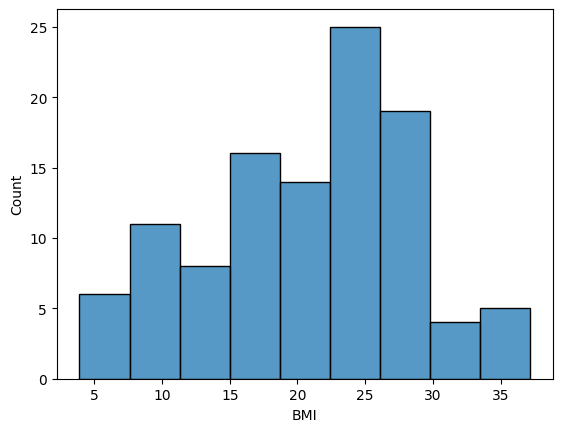

In [31]:
sns.histplot(x = obesity['BMI']) ;

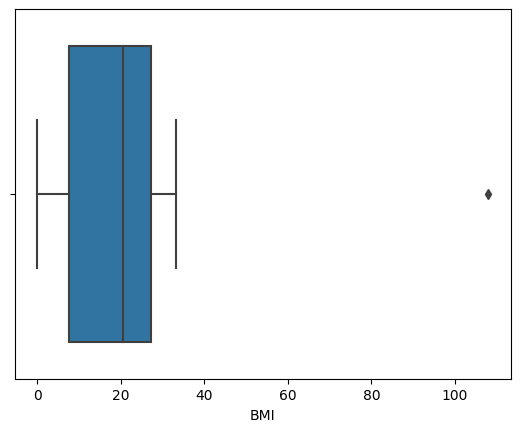

In [60]:
sns.boxplot(x = obesity['BMI']) ;

In [64]:
obesity['Label'].value_counts()

Label
9.00000      2
0.00000      2
23.74442     1
33.75478     1
5.00000      1
25.20000     1
108.00000    1
Name: count, dtype: int64

In [34]:
obesity.value_counts(subset = 'Label', normalize=True)

Label
Underweight      0.435185
Normal Weight    0.268519
Overweight       0.185185
Obese            0.111111
Name: proportion, dtype: float64

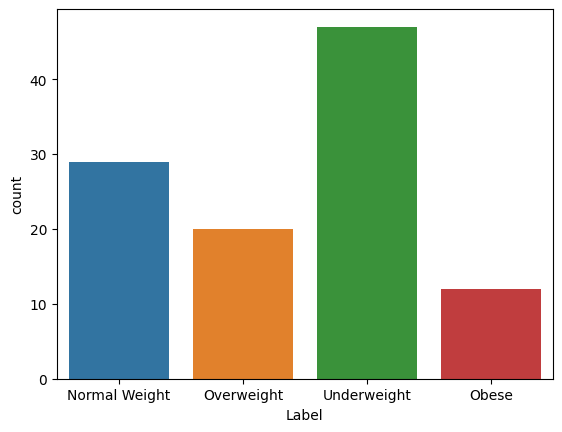

In [35]:
sns.countplot(x = obesity['Label']) ;

In [36]:
obesity.Label.describe()

count             108
unique              4
top       Underweight
freq               47
Name: Label, dtype: object

In [37]:
obesity.Label.unique()

array(['Normal Weight', 'Overweight', 'Underweight', 'Obese'],
      dtype=object)

In [41]:
obesity.groupby('Gender')[['BMI', 'Weight']].mean()

,BMI,Weight
Gender,,
Female,17.867308,47.019231
Male,23.039286,71.071429


In [43]:
obesity.groupby(['Gender', 'Label'])[['BMI', 'Weight']].mean()

BMI      Weight
Gender Label                               
Female Normal Weight  22.191667   60.416667
       Overweight     26.450000   81.250000
       Underweight    14.100000   33.437500
Male   Normal Weight  23.288235   68.529412
       Obese          32.341667  108.333333
       Overweight     26.700000   89.583333
       Underweight    12.386667   29.333333